# Urban Sounds Classification

In [50]:
# Dataset: https://urbansounddataset.weebly.com/urbansound8k.html

### 1. Spectrograms

In [1]:
# Spectrograms: https://drive.google.com/drive/folders/1xey3vAVNDjWxnSfhuUsf_5dGANZWmCog?usp=sharing

### 2. Preprocessing

In [23]:
# Packages

import librosa
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import librosa.display
from PIL import Image
import PIL
import glob
import random
import seaborn as sns

In [24]:
# Read the dataset file

metadata_path = r"C:\Users\pc\Desktop\UrbanSound8K\metadata\UrbanSound8K.csv"
metadata = pd.read_csv(metadata_path)
df = metadata.copy()

In [25]:
#The shape of the data

print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (8732, 8)


In [26]:
# Displaying the first 5 rows of the data

df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [27]:
#Number of unique values in each column

df.nunique()

slice_file_name    8732
fsID               1297
start              4878
end                5020
salience              2
fold                 10
classID              10
class                10
dtype: int64

In [28]:
#Summary

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fsID,8732.0,116033.493816,57991.017218,344.000000,69942.250000,118279.000000,166942.000000,209992.000000
start,8732.0,38.645409,74.292126,0.000000,3.000000,10.376492,35.131372,600.125356
end,8732.0,42.253312,74.369669,0.105962,6.839398,14.000000,38.866979,604.125356
salience,8732.0,1.347000,0.476043,1.000000,1.000000,1.000000,2.000000,2.000000
fold,8732.0,5.385937,2.846820,1.000000,3.000000,5.000000,8.000000,10.000000
classID,8732.0,4.592877,2.894544,0.000000,2.000000,4.000000,7.000000,9.000000


In [29]:
df["class"].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

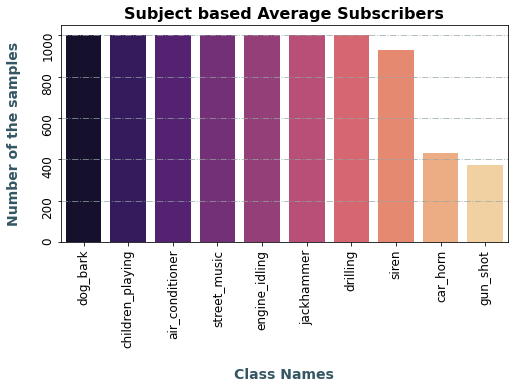

In [30]:
# Visualize the target column

plt.figure(figsize = (8,4))
sns.barplot(x = df["class"].value_counts().keys(),
            y = df["class"].value_counts(),
            palette="magma")
plt.title("Subject based Average Subscribers", fontsize= 16, fontweight = "bold")
plt.grid(color='#95a5a6', linestyle='-.', linewidth=1, axis='y', alpha=0.7)
plt.xlabel("Class Names", weight="bold", color="#355764", fontsize=14, labelpad = 20)
plt.ylabel("Number of the samples", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=90, fontsize=12)
plt.show()

In [31]:
# Creating spectrogram file path (fold + file name)

df["specs_path"] = '\\' + df['classID'].astype(str) + '\\' + df['slice_file_name'].astype(str).str.strip('.wav') + '.png'

In [32]:
# Update the dataset 

df = df[["specs_path","classID"]]
df.head()

,specs_path,classID
0,\3\100032-3-0-0.png,3
1,\2\100263-2-0-117.png,2
2,\2\100263-2-0-121.png,2
3,\2\100263-2-0-126.png,2
4,\2\100263-2-0-137.png,2


##### 2.1 Grayscale and Resize

In [33]:
# The funtion rgb to grayscale

def rgb_to_grayscale(loc, path):
    
    # grayscale
    gray_images = cv2.imread(loc+path, 0) 
    
    # resize
    images = cv2.resize(gray_images, (64,64)) 
        
    return images

In [34]:
# Loop to save all specs grayscale 

for spec in df["specs_path"]:
    loc = r'C:\Users\pc\Desktop\spectrograms' # location
    path = spec # image path
    gray_pic = rgb_to_grayscale(loc, path)
    cv2.imwrite(loc+path, gray_pic)

##### 2.2 Normalization 

In [35]:
# Creating a list [image,label]

img_arr = []

for i in range(len(df["specs_path"])):
    loc = r'C:\Users\pc\Desktop\spectrograms' # location
    path = df["specs_path"][i] # image path
    gray_imgs = cv2.imread(loc+path, 0)
    img_arr.append([gray_imgs, df["classID"][i]])

In [36]:
# Shuffle the data

random.shuffle(img_arr)

In [37]:
# Creating a dataframe 

img_df = pd.DataFrame(img_arr, columns=["images","classID"])

In [38]:
img_df.head()

,images,classID
0,"[[249, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
1,"[[249, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[[249, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
3,"[[249, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
4,"[[249, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7


In [39]:
# Shape of the sample image

img_df["images"][0].shape

(64, 64)

In [40]:
# Creating the X, y

X = np.array(img_df["images"].tolist())
y = np.array(img_df["classID"].tolist())

In [41]:
# Shape of the X (Features)

X.shape

(8732, 64, 64)

In [42]:
# Shape of the y (Target)

y.shape

(8732,)

In [43]:
# Normalization
# we can divide X by 255

X = X/255

In [44]:
X[0] # Now each values scaled between 0 and 1.

array([[0.97647059, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.97647059, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.97647059, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97647059, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.97647059, 0.        , 0.        , ..., 0.01568627, 0.        ,
        0.        ],
       [0.99607843, 0.97647059, 0.97647059, ..., 0.97647059, 0.97647059,
        0.97647059]])

##### 2.3 Dataset Splitting

In [45]:
print("Length of X: ",len(X))
print("Length of y: ",len(y))

Length of X:  8732
Length of y:  8732


In [46]:
# Roundly %80 train sets, %10 validation sets, %10 test sets

# Train datasets
X_train = X[:6980]
y_train = y[:6980]

# Validation datasets
X_val = X[6980:7856]
y_val = y[6980:7856]

# Test datasets
X_test = X[7856:8732]
y_test = y[7856:8732]

In [47]:
# The number of samples

print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")
print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")
print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 6980
y_train: 6980
X_val: 876
y_val: 876
X_test: 876
y_test: 876


##### 2.4 Save Datasets to Computer

In [48]:
# Pickle library

import pickle

In [49]:
# Save the datasets to computer

datasets = [X_train, y_train, X_val, y_val, X_test, y_test]
dataset_names = ['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test']

for i in range(len(datasets)):
    with open(r'C:\Users\pc\Desktop\datasets' + '\\' + dataset_names[i] + '.pkl', 'wb') as f:
        pickle.dump(datasets[i], f)